<a href="https://colab.research.google.com/github/jhogarciacu/TAM_2025_2/blob/main/tanjiro(Reducci%C3%B3n_de_caracteristicas_y_clusterin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://drive.google.com/file/d/1KENM6BW5UjRoSjnWmuBP_MS_NrC0cefP/view?usp=sharing

FILEID = "1KENM6BW5UjRoSjnWmuBP_MS_NrC0cefP"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O tanjiro.jpeg && rm -rf /tmp/cookies.txt

--2025-10-27 00:25:38--  https://docs.google.com/uc?export=download&confirm=&id=1KENM6BW5UjRoSjnWmuBP_MS_NrC0cefP
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.113, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1KENM6BW5UjRoSjnWmuBP_MS_NrC0cefP&export=download [following]
--2025-10-27 00:25:38--  https://drive.usercontent.google.com/download?id=1KENM6BW5UjRoSjnWmuBP_MS_NrC0cefP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6476 (6.3K) [image/jpeg]
Saving to: ‘tanjiro.jpeg’

tanjiro.jpeg        100%[===================>]   6.32K  --.-KB/s    in 0s      

20

In [3]:
!pip install umap-learn

In [2]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN,SpectralClustering

(125, 125, 3)

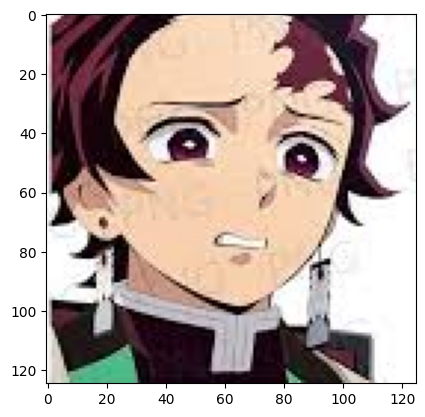

In [3]:
image = imread(os.path.join("tanjiro.jpeg"))
image = image[50:175,50:175,:]
plt.imshow(image)
image.shape

In [4]:
X = image.reshape(-1, 3)
r,c,ch = image.shape
print(r,c,ch)

125 125 3


In [5]:
vr = np.linspace(0,r,r,endpoint=False)
vc = np.linspace(0,c,c,endpoint=False)
Xc = np.kron(np.ones((r,1)),vc.reshape(-1,1))
Xr = np.kron(vr.reshape(-1,1),np.ones((1,c)))
Xc = Xc.reshape(-1)
Xr = Xr.reshape(-1)
X = np.c_[X,Xc,Xr]
X.shape

(15625, 5)

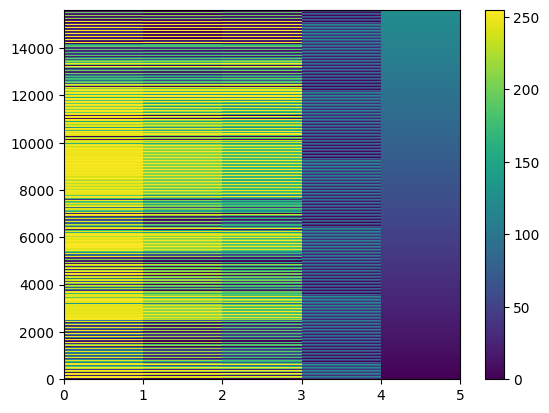

In [6]:
plt.pcolormesh(X)
plt.colorbar()
plt.show()

In [7]:
# Escalamos valores para que esten en las ismas dimensiones
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

# Reduccion de dimensiones

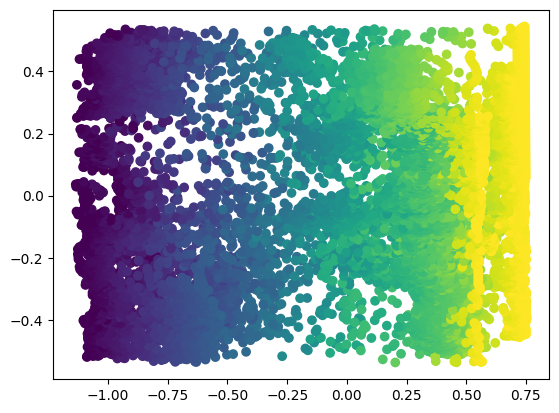

In [8]:
# PCA
X_pca = PCA(n_components=2).fit_transform(X_)
plt.scatter(X_pca[:,0], X_pca[:,1], c=X[:,2])
plt.show()

In [9]:
# UMAP
X_umap = UMAP(n_components=2,n_neighbors = 30,#round(np.sqrt(X_.shape[0])),
          min_dist =0.9).fit_transform(X_)


# **Tipos de clustering aplicados**

### K-means

In [12]:
kmeans = KMeans(n_clusters=4,n_init='auto').fit(X_)
kmeans.labels_

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

### K-means++

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init='auto').fit(X_)
labels_kmeans = kmeans.labels_

### Accelerated K-Means (Elkan)

In [14]:
kmeans_elkan = KMeans(n_clusters=4, algorithm='elkan', n_init='auto').fit(X_)
labels_elkan = kmeans_elkan.labels_

### MiniBatch K-Means

In [15]:
minibatch = MiniBatchKMeans(n_clusters=4, batch_size=100).fit(X_)
labels_minibatch = minibatch.labels_

### DBSCAN

In [16]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_)
labels_dbscan = dbscan.labels_

### Spectral Clustering

In [17]:
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors').fit(X_)
labels_spectral = spectral.labels_

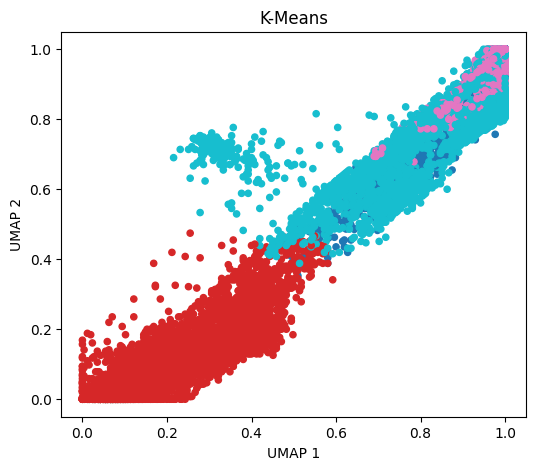

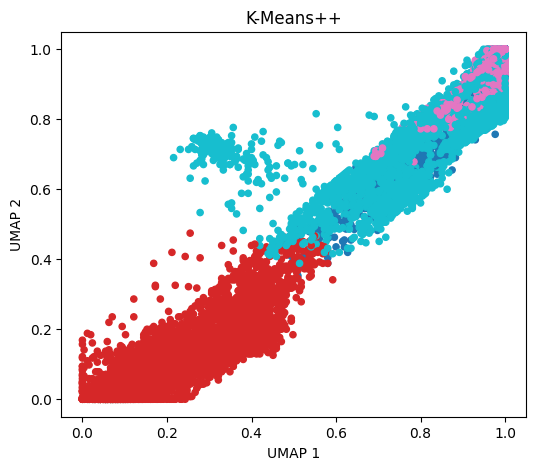

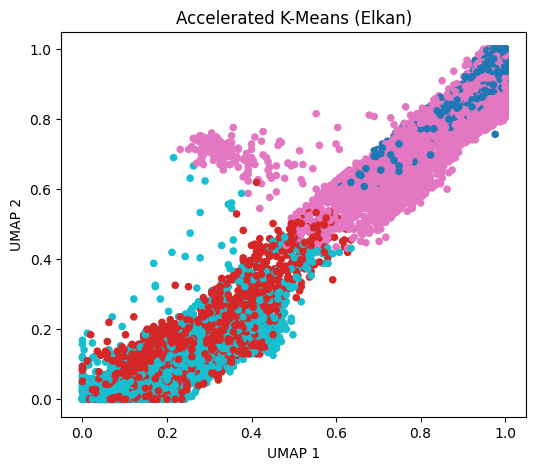

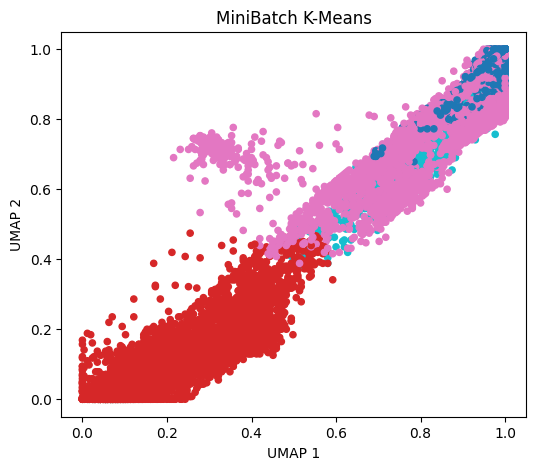

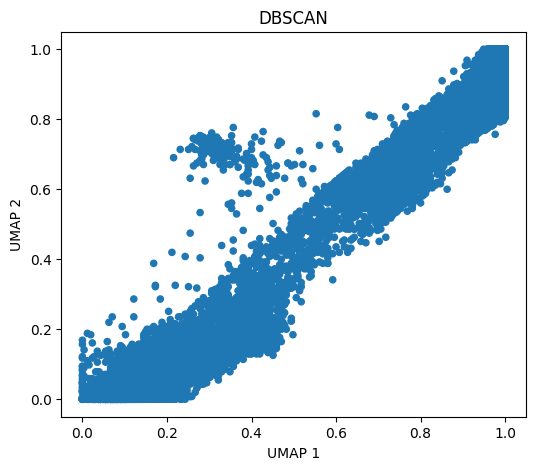

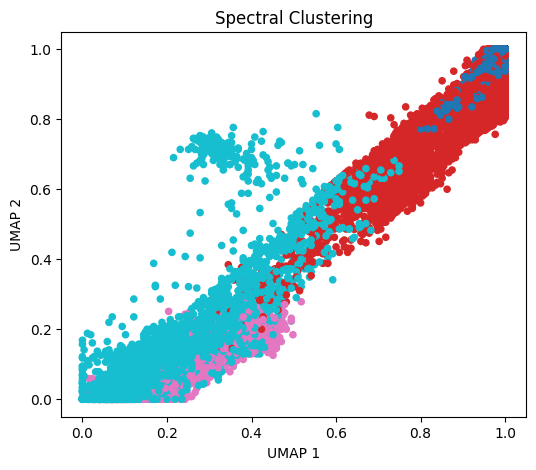

In [18]:
def plot_clusters(X_, labels, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(X_[:, 0], X_[:, 1], c=labels, cmap='tab10', s=20)
    plt.title(title)
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()

plot_clusters(X_, kmeans.labels_, "K-Means")
plot_clusters(X_, labels_kmeans, "K-Means++")
plot_clusters(X_, labels_elkan, "Accelerated K-Means (Elkan)")
plot_clusters(X_, labels_minibatch, "MiniBatch K-Means")
plot_clusters(X_, labels_dbscan, "DBSCAN")
plot_clusters(X_, labels_spectral, "Spectral Clustering")


# Visualizacion con imagen procesada


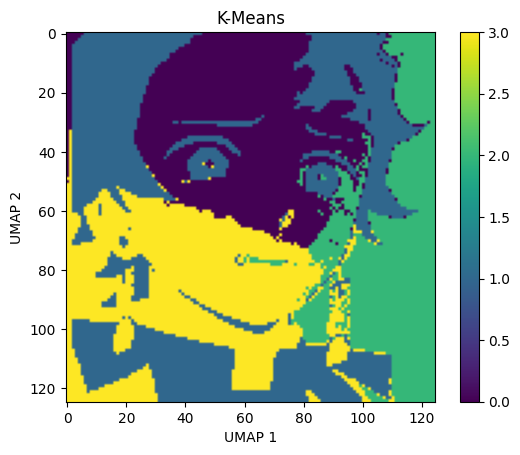

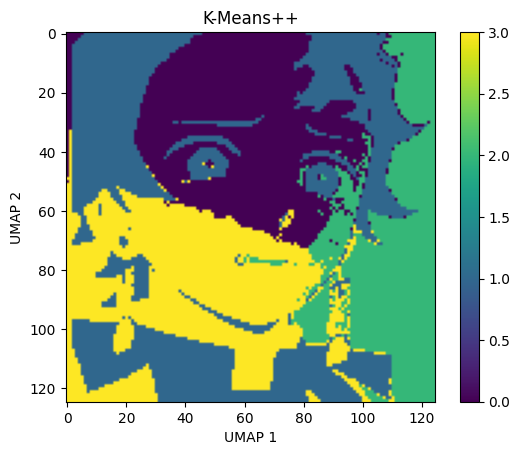

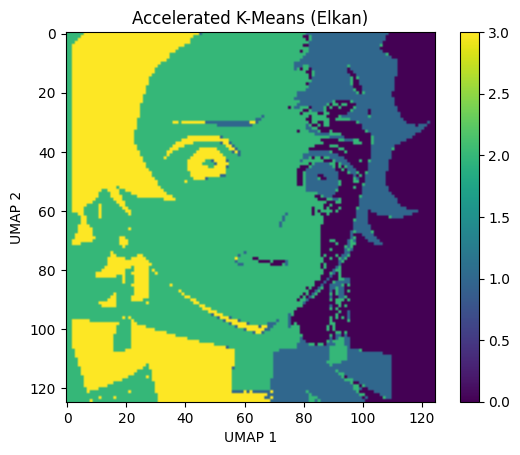

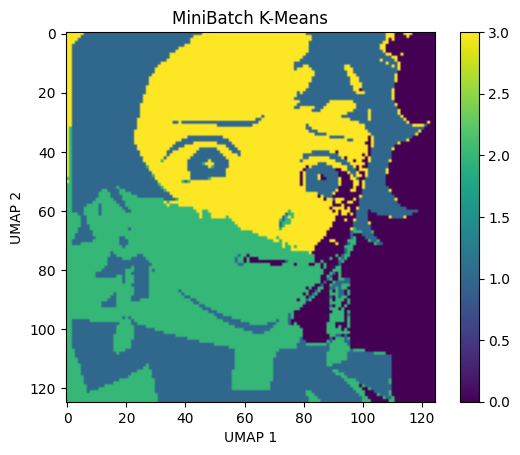

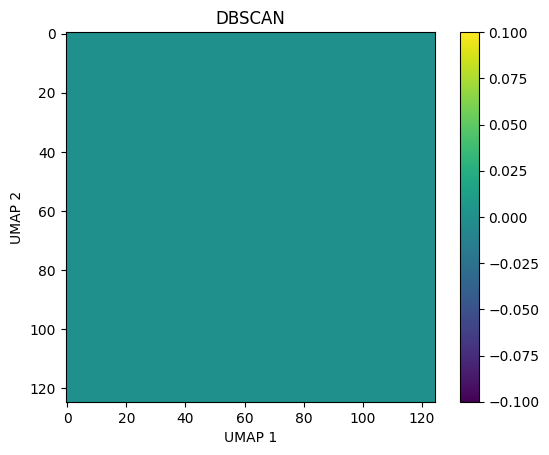

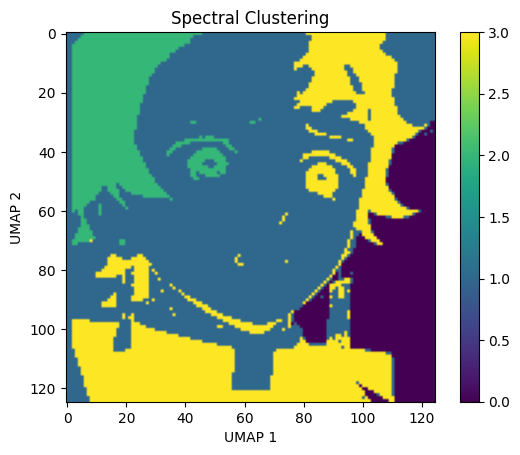

In [19]:
def plot_clusters_image(labels, title):
  labels_ = labels
  Ilabels = labels_.reshape(r,c)
  plt.imshow(Ilabels)
  plt.colorbar()
  plt.title(title)
  plt.xlabel('UMAP 1')
  plt.ylabel('UMAP 2')
  plt.show()


plot_clusters_image(kmeans.labels_, "K-Means")
plot_clusters_image(labels_kmeans, "K-Means++")
plot_clusters_image(labels_elkan, "Accelerated K-Means (Elkan)")
plot_clusters_image(labels_minibatch, "MiniBatch K-Means")
plot_clusters_image(labels_dbscan, "DBSCAN")
plot_clusters_image(labels_spectral, "Spectral Clustering")

In [20]:
D_ = kmeans.transform(X_)
D_.shape
ind_ = np.argmin(D_,axis=0)

In [21]:
D_.shape
ind_

array([ 3939,  6050,  8856, 11294])

In [22]:
centroids_ = X[ind_,:3]
centroids_

array([[240., 209., 189.],
       [ 66.,  19.,  35.],
       [246., 246., 244.],
       [233., 195., 176.]])

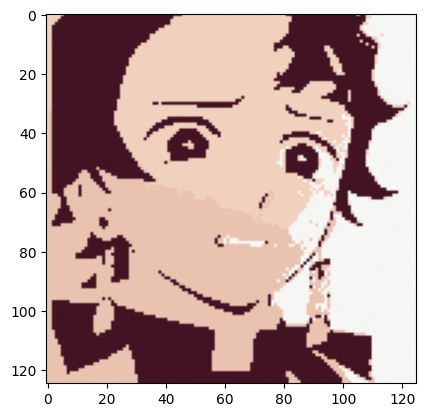

In [23]:
segmented_img = centroids_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img/255.)

plt.show()

In [24]:
centroids_[kmeans.labels_]

array([[240., 209., 189.],
       [240., 209., 189.],
       [240., 209., 189.],
       ...,
       [246., 246., 244.],
       [246., 246., 244.],
       [246., 246., 244.]])

In [25]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [10]:
def evaluar_clustering(X_, modelos, k_values=None, random_state=42):

    resultados_globales = []
    mejor_silhouette = -1
    mejor_modelo = None
    mejor_labels = None
    mejor_nombre = None
    mejor_k = None

    for nombre, constructor in modelos.items():
        print(f"\n🔹 Evaluando modelo: {nombre}")
        resultados = []

        # Si el modelo usa k (tiene parámetro n_clusters)
        if k_values:
            for k in k_values:
                modelo = constructor(k)
                labels = modelo.fit_predict(X_)

                if hasattr(modelo, 'inertia_'):
                    inertia = modelo.inertia_
                else:
                    inertia = np.nan

                if len(set(labels)) > 1:
                    silhouette = silhouette_score(X_, labels)
                else:
                    silhouette = np.nan

                resultados.append({'Modelo': nombre, 'k': k, 'Inercia': inertia, 'Silhouette': silhouette})

                # Guardar el mejor modelo global
                if silhouette > mejor_silhouette:
                    mejor_silhouette = silhouette
                    mejor_modelo = modelo
                    mejor_labels = labels
                    mejor_nombre = nombre
                    mejor_k = k

        else:  # Para modelos sin parámetro de k (como DBSCAN)
            modelo = constructor(None)
            labels = modelo.fit_predict(X_)
            inertia = np.nan
            silhouette = silhouette_score(X_, labels) if len(set(labels)) > 1 else np.nan
            resultados.append({'Modelo': nombre, 'k': np.nan, 'Inercia': inertia, 'Silhouette': silhouette})

            if silhouette > mejor_silhouette:
                mejor_silhouette = silhouette
                mejor_modelo = modelo
                mejor_labels = labels
                mejor_nombre = nombre
                mejor_k = None

        df_modelo = pd.DataFrame(resultados)
        resultados_globales.append(df_modelo)
        print(df_modelo)

    # Combinar todos los resultados
    df_resultados = pd.concat(resultados_globales, ignore_index=True)

    # Graficar comparación de Silhouette entre modelos
    plt.figure(figsize=(8, 4))
    for nombre in df_resultados['Modelo'].unique():
        subset = df_resultados[df_resultados['Modelo'] == nombre]
        plt.plot(subset['k'], subset['Silhouette'], 'o-', label=nombre)
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Comparación de Silhouette entre Modelos')
    plt.legend()
    plt.show()

    # Graficar el mejor resultado encontrado
    plt.figure(figsize=(6, 5))
    plt.scatter(X_[:, 0], X_[:, 1], c=mejor_labels, cmap='tab10', s=20)
    titulo = f"🏆 Mejor modelo: {mejor_nombre}"
    if mejor_k:
        titulo += f" (k={mejor_k})"
    titulo += f"\nSilhouette={mejor_silhouette:.3f}"
    plt.title(titulo)
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()

    return mejor_modelo, mejor_nombre, mejor_k, df_resultados



🔹 Evaluando modelo: K-Means
    Modelo  k      Inercia  Silhouette
0  K-Means  3  2697.633978    0.375430
1  K-Means  5  1882.318123    0.332932
2  K-Means  7  1575.067742    0.333380
3  K-Means  9  1043.703131    0.369390

🔹 Evaluando modelo: K-Means++
      Modelo  k      Inercia  Silhouette
0  K-Means++  3  2697.633978    0.375430
1  K-Means++  5  1882.318123    0.332932
2  K-Means++  7  1575.067742    0.333380
3  K-Means++  9  1043.703131    0.369390

🔹 Evaluando modelo: MiniBatch K-Means
              Modelo  k      Inercia  Silhouette
0  MiniBatch K-Means  3  2840.856682    0.490574
1  MiniBatch K-Means  5  2019.104572    0.317915
2  MiniBatch K-Means  7  1310.328409    0.375200
3  MiniBatch K-Means  9  1078.224188    0.386855

🔹 Evaluando modelo: Spectral Clustering
                Modelo  k  Inercia  Silhouette
0  Spectral Clustering  3      NaN    0.491417
1  Spectral Clustering  5      NaN    0.373325
2  Spectral Clustering  7      NaN    0.357483
3  Spectral Clustering  9  

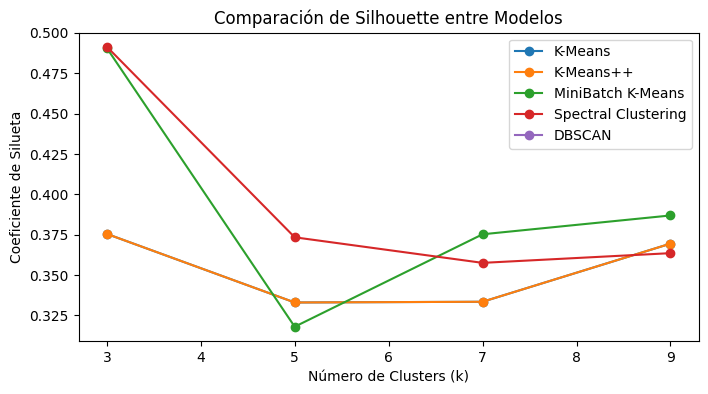

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


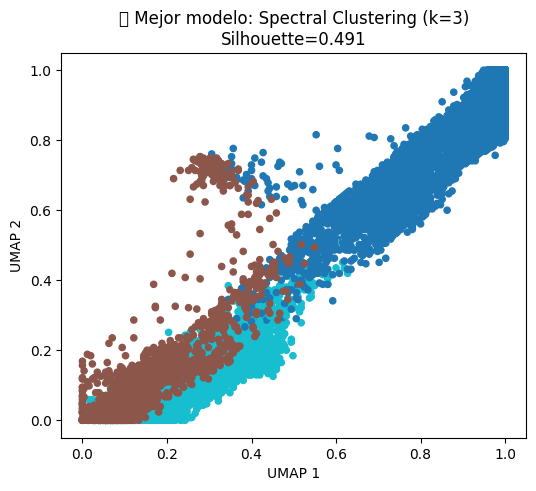

In [14]:
modelos = {
    "K-Means": lambda k: KMeans(n_clusters=k, n_init='auto', random_state=42),
    "K-Means++": lambda k: KMeans(n_clusters=k, init='k-means++', random_state=42),
    "MiniBatch K-Means": lambda k: MiniBatchKMeans(n_clusters=k, random_state=42),
    "Spectral Clustering": lambda k: SpectralClustering(n_clusters=k, random_state=42),
    "DBSCAN": lambda k: DBSCAN(eps=0.3, min_samples=5)
}

# Buscamos mejor clustering sin reducción
mejor_modelo, mejor_nombre, mejor_k, resultados = evaluar_clustering(X_, modelos, k_values=[3, 5, 7, 9])



🔹 Evaluando modelo: K-Means
    Modelo  k      Inercia  Silhouette
0  K-Means  3  1618.731497    0.594024
1  K-Means  5  1097.763887    0.385749
2  K-Means  7   550.121778    0.452490
3  K-Means  9   406.196535    0.476102

🔹 Evaluando modelo: K-Means++
      Modelo  k      Inercia  Silhouette
0  K-Means++  3  1618.731497    0.594024
1  K-Means++  5  1097.763887    0.385749
2  K-Means++  7   550.121778    0.452490
3  K-Means++  9   406.196535    0.476102

🔹 Evaluando modelo: MiniBatch K-Means
              Modelo  k      Inercia  Silhouette
0  MiniBatch K-Means  3  1652.735788    0.430678
1  MiniBatch K-Means  5   976.462964    0.410378
2  MiniBatch K-Means  7   556.546338    0.453027
3  MiniBatch K-Means  9   418.990078    0.463389

🔹 Evaluando modelo: Spectral Clustering
                Modelo  k  Inercia  Silhouette
0  Spectral Clustering  3      NaN    0.594523
1  Spectral Clustering  5      NaN    0.418491
2  Spectral Clustering  7      NaN    0.399547
3  Spectral Clustering  9  

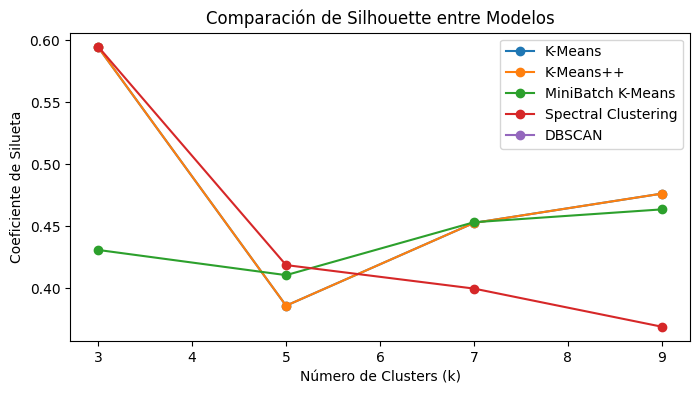

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


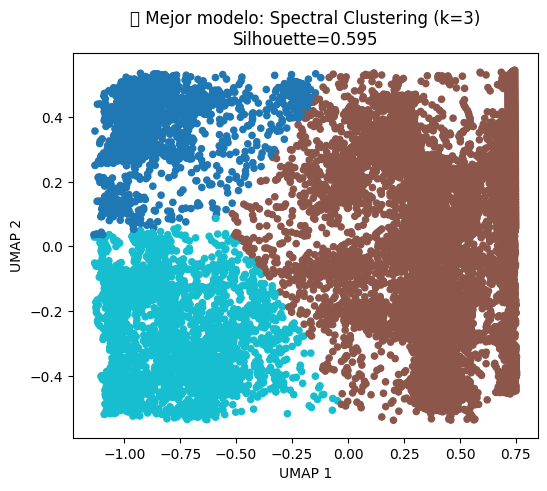

In [12]:
# Buscamos mejor clustering con PCA
mejor_modelo, mejor_nombre, mejor_k, resultados = evaluar_clustering(X_pca, modelos, k_values=[3, 5, 7, 9])



🔹 Evaluando modelo: K-Means
    Modelo  k        Inercia  Silhouette
0  K-Means  3  750146.562500    0.393648
1  K-Means  5  455333.062500    0.362210
2  K-Means  7  307685.312500    0.383539
3  K-Means  9  244729.265625    0.365341

🔹 Evaluando modelo: K-Means++
      Modelo  k        Inercia  Silhouette
0  K-Means++  3  750146.562500    0.393648
1  K-Means++  5  455333.062500    0.362210
2  K-Means++  7  307685.312500    0.383539
3  K-Means++  9  244729.265625    0.365341

🔹 Evaluando modelo: MiniBatch K-Means
              Modelo  k        Inercia  Silhouette
0  MiniBatch K-Means  3  863361.687500    0.351613
1  MiniBatch K-Means  5  456305.750000    0.362878
2  MiniBatch K-Means  7  342941.531250    0.348935
3  MiniBatch K-Means  9  258302.890625    0.356320

🔹 Evaluando modelo: Spectral Clustering
                Modelo  k  Inercia  Silhouette
0  Spectral Clustering  3      NaN    0.351660
1  Spectral Clustering  5      NaN    0.309345
2  Spectral Clustering  7      NaN    0.2715

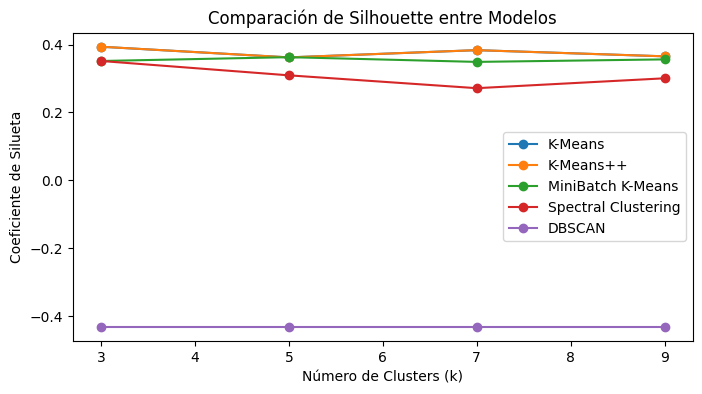

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


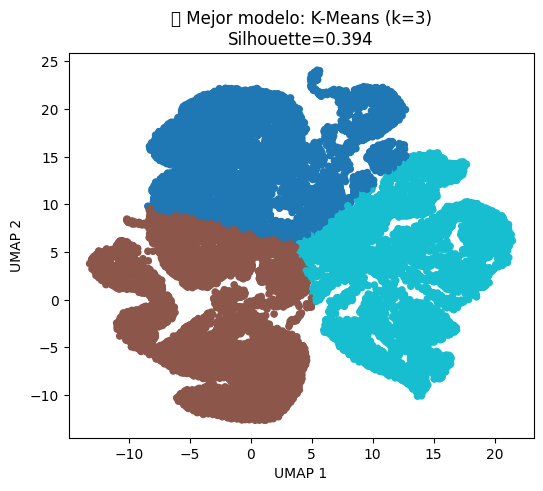

In [13]:
# Buscamos mejor clustering con UMAP
mejor_modelo, mejor_nombre, mejor_k, resultados = evaluar_clustering(X_umap, modelos, k_values=[3, 5, 7, 9])
